In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import rasterio as rst
from rasterio.mask import mask
import geopandas as gpd

from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

import warnings
warnings.filterwarnings("ignore")

In [3]:
prvi_f = pd.read_csv('D:/thesis_data/VEG_INDICES/stats/florestalPRVI_reindex.csv')
prvi_s = pd.read_csv('D:/thesis_data/VEG_INDICES/stats/savanicaPRVI_reindex.csv')
prvi_c = pd.read_csv('D:/thesis_data/VEG_INDICES/stats/campestrePRVI_reindex.csv')

dpsvi_f = pd.read_csv('D:/thesis_data/VEG_INDICES/stats/florestalDPSVI_reindex.csv')
dpsvi_s = pd.read_csv('D:/thesis_data/VEG_INDICES/stats/savanicaDPSVI_reindex.csv')
dpsvi_c = pd.read_csv('D:/thesis_data/VEG_INDICES/stats/campestreDPSVI_reindex.csv')



In [4]:
# dprvi_f = pd.read_csv('D:/thesis_data/VEG_INDICES/dprvi_parameters/stats/savanica_DpRVI.csv')
# dprvi_f = dprvi_f.reindex(index=dprvi_f.index[::-1])
# dprvi_f.reset_index(inplace=True, drop=True)
# dprvi_f.to_csv('D:/thesis_data/VEG_INDICES/dprvi_parameters/stats/savanica_DpRVI_reindex.csv', index=False)

In [5]:
def month_season_detector(df):

    df['data'] = pd.to_datetime(df['date'], format='%Y/%m/%d')

    df['month'] = df['data'].dt.month

    df.loc[df['month']==1,'mes'] = 'Jan'
    df.loc[df['month']==2,'mes'] = 'Feb'
    df.loc[df['month']==3,'mes'] = 'Mar'
    df.loc[df['month']==4,'mes'] = 'Apr'
    df.loc[df['month']==5,'mes'] = 'May'
    df.loc[df['month']==6,'mes'] = 'Jun'
    df.loc[df['month']==7,'mes'] = 'Jul'
    df.loc[df['month']==8,'mes'] = 'Aug'
    df.loc[df['month']==9,'mes'] = 'Sep'
    df.loc[df['month']==10,'mes'] = 'Oct'
    df.loc[df['month']==11,'mes'] = 'Nov'
    df.loc[df['month']==12,'mes'] = 'Dec'

    df.loc[df['month']==1,'season'] = 'wet'
    df.loc[df['month']==2,'season'] = 'wet'
    df.loc[df['month']==3,'season'] = 'wet'
    df.loc[df['month']==4,'season'] = 'wet'
    df.loc[df['month']==5,'season'] = 'dry'
    df.loc[df['month']==6,'season'] = 'dry'
    df.loc[df['month']==7,'season'] = 'dry'
    df.loc[df['month']==8,'season'] = 'dry'
    df.loc[df['month']==9,'season'] = 'dry'
    df.loc[df['month']==10,'season'] = 'wet'
    df.loc[df['month']==11,'season'] = 'wet'
    df.loc[df['month']==12,'season'] = 'wet'

In [6]:
month_season_detector(dprvi_f)
month_season_detector(dprvi_s)
month_season_detector(dprvi_c)
month_season_detector(prvi_f)
month_season_detector(prvi_s)
month_season_detector(prvi_c)
month_season_detector(dpsvi_f)
month_season_detector(dpsvi_s)
month_season_detector(dpsvi_c)
month_season_detector(dpsvim_f)
month_season_detector(dpsvim_s)
month_season_detector(dpsvim_c)


In [7]:
red_circle = dict(markerfacecolor='red', marker='o', markersize=10, markeredgecolor='white')

pink_patch = dict(facecolor='pink', color='k')
blue_patch = dict(facecolor='lightblue', color='k')
green_patch = dict(facecolor='lightgreen', color='k')
orange_patch = dict(facecolor='orange', color='k')
yellow_patch = dict(facecolor='yellow', color='k')

median_patch = dict(color='red')

In [8]:

prvi_f_dict = {'wet': prvi_f.loc[prvi_f['season']=='wet']['median'].values, 'dry': prvi_f.loc[prvi_f['season']=='dry']['median'].values}
prvi_s_dict = {'wet': prvi_s.loc[prvi_s['season']=='wet']['median'].values, 'dry': prvi_s.loc[prvi_s['season']=='dry']['median'].values}
prvi_c_dict = {'wet': prvi_c.loc[prvi_c['season']=='wet']['median'].values, 'dry': prvi_c.loc[prvi_c['season']=='dry']['median'].values}

dpsvi_f_dict = {'wet': dpsvi_f.loc[dpsvi_f['season']=='wet']['median'].values, 'dry': dpsvi_f.loc[dpsvi_f['season']=='dry']['median'].values}
dpsvi_s_dict = {'wet': dpsvi_s.loc[dpsvi_s['season']=='wet']['median'].values, 'dry': dpsvi_s.loc[dpsvi_s['season']=='dry']['median'].values}
dpsvi_c_dict = {'wet': dpsvi_c.loc[dpsvi_c['season']=='wet']['median'].values, 'dry': dpsvi_c.loc[dpsvi_c['season']=='dry']['median'].values}

dpsvim_f_dict = {'wet': dpsvim_f.loc[dpsvim_f['season']=='wet']['median'].values, 'dry': dpsvim_f.loc[dpsvim_f['season']=='dry']['median'].values}
dpsvim_s_dict = {'wet': dpsvim_s.loc[dpsvim_s['season']=='wet']['median'].values, 'dry': dpsvim_s.loc[dpsvim_s['season']=='dry']['median'].values}
dpsvim_c_dict = {'wet': dpsvim_c.loc[dpsvim_c['season']=='wet']['median'].values, 'dry': dpsvim_c.loc[dpsvim_c['season']=='dry']['median'].values}



In [9]:
q1 = np.quantile(dpsvi_c['median'], 0.25)
q3 = np.quantile(dpsvi_c['median'], 0.75)

iqr = q3 - q1

In [10]:
dpsvi_c['upper_bound'] = q3+(1.5*iqr)
dpsvi_c['lower_bound'] = q1-(1.5*iqr)

In [11]:
outliers = dpsvi_c['date'][(dpsvi_c['median'] <= dpsvi_c['lower_bound']) | (dpsvi_c['median'] >= dpsvi_c['upper_bound'])]

In [12]:
rain = pd.read_csv('D:/thesis_data/pluviometric_data/pluviometric_data_PNB_paper_01.csv', sep=',')

In [13]:
month_season_detector(rain)

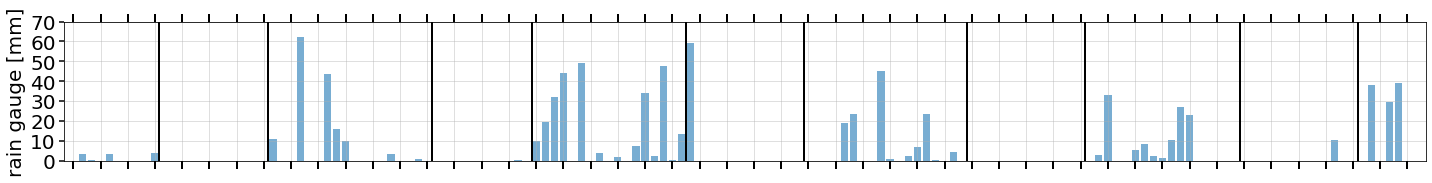

In [180]:
label_size = 20

x = dpsvim_f.index

fig, ax = plt.subplots(figsize=(20,2.5))

ax.vlines(x[9] + 0.5, ymin=0, ymax=100, colors='k', linewidth=2)
ax.vlines(x[21] + 0.5, ymin=0, ymax=100, colors='k', linewidth=2)
ax.vlines(x[39] + 0.5, ymin=0, ymax=100, colors='k', linewidth=2)
ax.vlines(x[50] + 0.5, ymin=0, ymax=100, colors='k', linewidth=2)
ax.vlines(x[67] + 0.5, ymin=0, ymax=100, colors='k', linewidth=2)
ax.vlines(x[80] + 0.5, ymin=0, ymax=100, colors='k', linewidth=2)
ax.vlines(x[98] + 0.5, ymin=0, ymax=100, colors='k', linewidth=2)
ax.vlines(x[111] + 0.5, ymin=0, ymax=100, colors='k', linewidth=2)
ax.vlines(x[128] + 0.5, ymin=0, ymax=100, colors='k', linewidth=2)
ax.vlines(x[141] + 0.5, ymin=0, ymax=100, colors='k', linewidth=2)

ax.bar(rain['date'], rain['gauge_mm'], alpha=0.6)
ax.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=False, length=8, width=2)
ax.set_xticks(ticks=x)
ax.set_xticklabels(labels=dpsvim_f['mes'], fontdict={'fontsize': 20, 'rotation': -60})
ax.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
ax.set_ylim([0, 70])
ax.set_xlim([-1, 149])
ax.set_ylabel('rain gauge [mm]', fontsize=20)
ax.locator_params(axis='x', nbins=60)
ax.locator_params(axis='y', nbins=12)
ax.grid(True, alpha=0.5)

plt.tight_layout()

# plt.savefig('C:/Users/jales/Desktop/dpsvim_std.svg', dpi=None, facecolor='w', edgecolor='w',
#     orientation='landscape', format='svg', transparent=False)

## PRVI

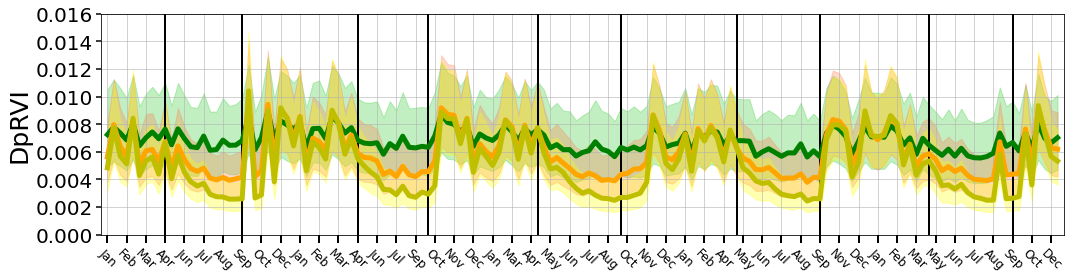

In [18]:
label_size = 20

x = prvi_f.index

fig, ax = plt.subplots(figsize=(15,4))

ax.vlines(x[9], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[21], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[39], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[50], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[67], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[80], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[98], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[111], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[128], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[141], ymin=0, ymax=1.5, colors='k', linewidth=2)

ax.plot(x, prvi_f['median'], 'green', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Forest')
ax.fill_between(x, prvi_f['percentile_25'], prvi_f['percentile_75'], alpha=0.3, color='limegreen')

ax.plot(x, prvi_s['median'], 'orange', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Savanna')
ax.fill_between(x, prvi_s['percentile_25'], prvi_s['percentile_75'], alpha=0.3, color='coral')

ax.plot(x, prvi_c['median'], 'y', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Grassland')
ax.fill_between(x, prvi_c['percentile_25'], prvi_c['percentile_75'], alpha=0.3, color='yellow')

ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, length=8, width=2)
ax.set_xticks(ticks=x)
ax.set_xticklabels(labels=prvi_f['mes'], fontdict={'fontsize': 12, 'rotation': -45})
ax.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
ax.set_ylim([0, 0.016])
ax.set_xlim([-1, 149])
ax.set_ylabel('PRVI', fontsize=25)
ax.locator_params(axis='x', nbins=60)
ax.locator_params(axis='y', nbins=8)
#ax.legend(fontsize=15, loc='lower left')
ax.grid(True, alpha=0.7)

# sec_0 = ax.twinx()
# sec_0.bar(rain['date'], rain['gauge_mm'], alpha=0.6)
# sec_0.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
# sec_0.locator_params(axis='y', nbins=12)
# sec_0.set_ylim([0, 70])
# sec_0.set_ylabel('rain gauge [mm]', fontsize=20)

# sec_0.set_yticks(np.linspace(sec_0.get_yticks()[0], sec_0.get_yticks()[-1], len(ax.get_yticks())))

plt.tight_layout()

# plt.savefig('C:/Users/jales/Desktop/prvi_profiles.svg', dpi=None, facecolor='w', edgecolor='w',
#     orientation='landscape', format='svg', transparent=False)

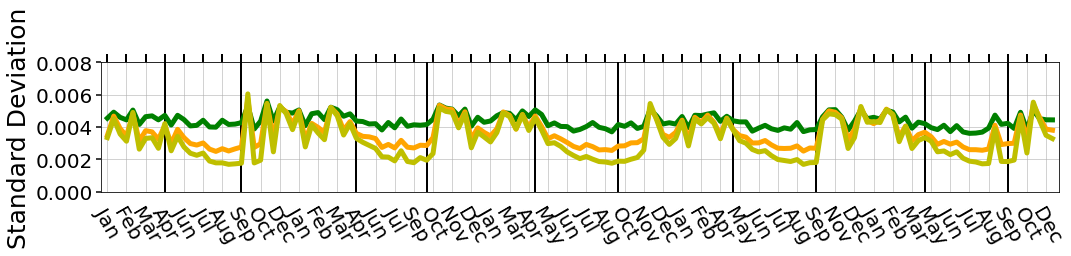

In [30]:
label_size = 20

x = prvi_f.index

fig, ax = plt.subplots(figsize=(15,3))

ax.vlines(x[9], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[21], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[39], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[50], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[67], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[80], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[98], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[111], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[128], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[141], ymin=0, ymax=1.5, colors='k', linewidth=2)

ax.plot(x, prvi_f['std'], 'green', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Forest')
ax.plot(x, prvi_s['std'], 'orange', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Savanna')
ax.plot(x, prvi_c['std'], 'y', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Grassland')

ax.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=True, length=8, width=2)
ax.set_xticks(ticks=x)
ax.set_xticklabels(labels=prvi_f['mes'], fontdict={'fontsize': 20, 'rotation': -60})
ax.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
ax.set_ylim([0, 0.008])
ax.set_xlim([-1, 149])
ax.set_ylabel('Standard Deviation', fontsize=25)
ax.locator_params(axis='x', nbins=60)
ax.locator_params(axis='y', nbins=5)
ax.grid(True, alpha=0.7)

plt.tight_layout()

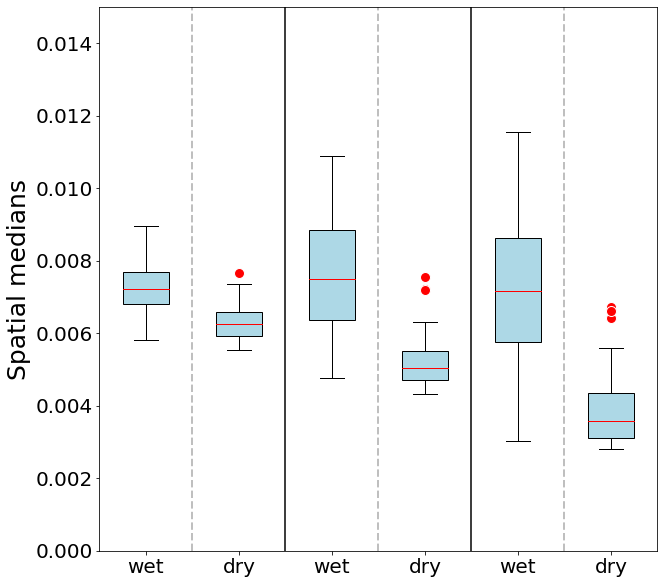

In [36]:
prvi_f_dict = {'wet': prvi_f.loc[prvi_f['season']=='wet']['median'].values, 'dry': prvi_f.loc[prvi_f['season']=='dry']['median'].values}
prvi_s_dict = {'wet': prvi_s.loc[prvi_s['season']=='wet']['mean'].values, 'dry': prvi_s.loc[prvi_s['season']=='dry']['mean'].values}
prvi_c_dict = {'wet': prvi_c.loc[prvi_c['season']=='wet']['mean'].values, 'dry': prvi_c.loc[prvi_c['season']=='dry']['mean'].values}

fig, ax = plt.subplots(figsize=(10, 10))

ax.vlines(1.5, ymin=0, ymax=1.5, colors='grey', linewidth=2, linestyle='--', alpha=0.5)
ax.vlines(2.5, ymin=0, ymax=1.5, colors='k')
ax.vlines(3.5, ymin=0, ymax=1.5, colors='grey', linewidth=2, linestyle='--', alpha=0.5)
ax.vlines(4.5, ymin=0, ymax=1.5, colors='k')
ax.vlines(5.5, ymin=0, ymax=1.5, colors='grey', linewidth=2, linestyle='--', alpha=0.5)

ax.boxplot([prvi_f_dict['wet'], prvi_f_dict['dry'], prvi_s_dict['wet'], prvi_s_dict['dry'], prvi_c_dict['wet'], prvi_c_dict['dry']], patch_artist=True, flierprops=red_circle, boxprops=blue_patch, medianprops=median_patch)
ax.set_ylim([0, 0.015])
ax.set_xticklabels(labels=['wet', 'dry', 'wet', 'dry', 'wet', 'dry'], fontdict={'fontsize': 20})
#ax.locator_params(axis='y', nbins=12)
ax.set_ylabel('Spatial medians', fontsize=25)
ax.tick_params(axis='y', labelsize=20)

In [37]:
water = gpd.read_file('D:/thesis_data/ROI/classes/agua_10m_32723.geojson')
water = [geom for geom in water.geometry]

with rst.open('D:/thesis_data/VEG_INDICES/raster/20201222T084517.tif') as raster:
    image, _ = mask(raster, water, invert=True, nodata=np.nan)

    prvi = image[1]

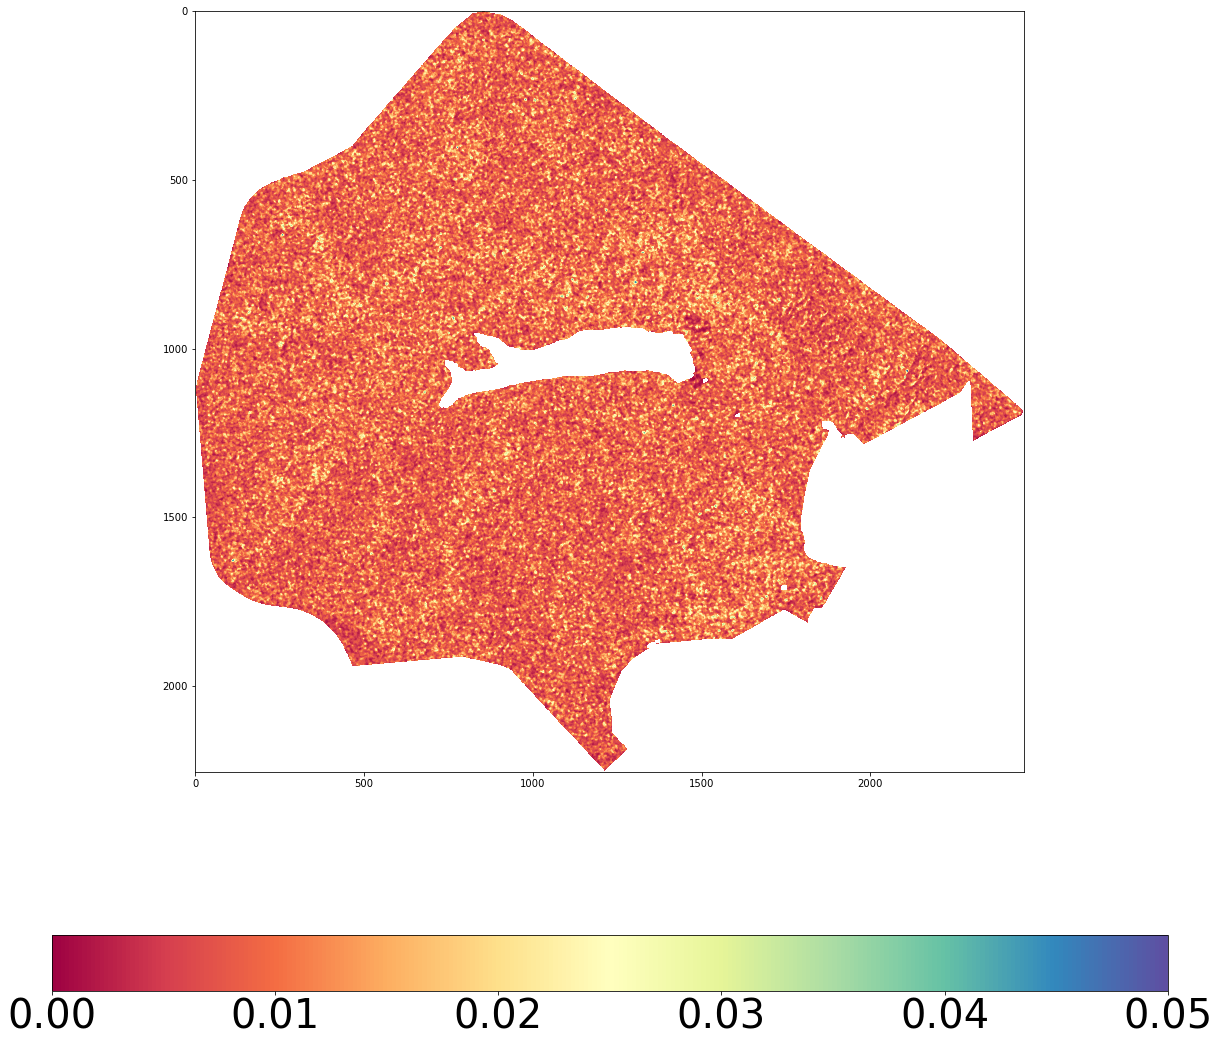

In [62]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.imshow(prvi, cmap='Spectral', vmin=0, vmax=0.05)

norm = Normalize(vmin=0, vmax=0.05)
cbar = fig.colorbar(cm.ScalarMappable(norm = norm, cmap='Spectral'), ax=ax, location='bottom')
cbar.ax.tick_params(labelsize=40)
cbar.ax.locator_params(axis='y', nbins=10)

# plt.savefig('C:/Users/jales/Desktop/dprvi_wet.svg', dpi=None, facecolor='w', edgecolor='w',
#     orientation='landscape', format='svg', transparent=False)

## DPSVI

In [ ]:
label_size = 20

fig, ax = plt.subplots(3, 2, figsize=(30, 9), gridspec_kw={'width_ratios': [22, 1]})

ax[0,0].vlines(dpsvi_f.index[9], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax[0,0].vlines(dpsvi_f.index[21], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax[0,0].vlines(dpsvi_f.index[39], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax[0,0].vlines(dpsvi_f.index[50], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax[0,0].vlines(dpsvi_f.index[67], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax[0,0].vlines(dpsvi_f.index[80], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax[0,0].vlines(dpsvi_f.index[98], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax[0,0].vlines(dpsvi_f.index[111], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax[0,0].vlines(dpsvi_f.index[128], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax[0,0].vlines(dpsvi_f.index[141], ymin=0, ymax=1.5, colors='k', linewidth=2)

ax[0,0].vlines(dpsvi_f.index, ymin=dpsvi_f['percentile_25'], ymax=dpsvi_f['percentile_75'], colors='k', linewidth=2)
ax[0,0].plot(dpsvi_f.index, dpsvi_f['median'], 'limegreen', marker='o', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=3, label='median')
ax[0,0].plot(dpsvi_f.index, dpsvi_f['percentile_25'], 'ok', marker='_')
ax[0,0].plot(dpsvi_f.index, dpsvi_f['percentile_75'], 'ok', marker='_')
ax[0,0].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False, length=8, width=2)
ax[0,0].set_xticks(ticks=rvi_f.index)
ax[0,0].tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
ax[0,0].set_ylim([-0.1, 0.6])
ax[0,0].set_xlim([-1, 149])
ax[0,0].set_ylabel('GF', fontsize=25)
ax[0,0].locator_params(axis='x', nbins=60)
ax[0,0].locator_params(axis='y', nbins=8)
ax[0,0].legend(loc='upper left', fontsize=15)

ax[0,1].boxplot(dpsvi_f_dict.values(), patch_artist=True, flierprops=red_circle, boxprops=pink_patch, medianprops=median_patch)
ax[0,1].tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
ax[0,1].set_xticklabels(dpsvi_f_dict.keys(), fontsize=15)
ax[0,1].set_ylim([0, 0.5])
ax[0,1].locator_params(axis='y', nbins=10)

sec_2 = ax[0,0].twinx()
sec_2.plot(dpsvi_f.index, dpsvi_f['std'], 'crimson', linewidth=3, label='std')
sec_2.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
sec_2.set_ylabel('std', fontsize=20)
sec_2.locator_params(axis='y', nbins=12)
sec_2.set_ylim([0, 0.2])
sec_2.legend(loc='upper right', fontsize=15)


# temporal profiles
ax[1,0].vlines(dpsvi_s.index, ymin=dpsvi_s['percentile_25'], ymax=dpsvi_s['percentile_75'], colors='k', linewidth=2)
ax[1,0].plot(dpsvi_s.index, dpsvi_s['median'], 'orange', marker='o', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=3, label='median')
ax[1,0].plot(dpsvi_s.index, dpsvi_s['percentile_25'], 'ok', marker='_')
ax[1,0].plot(dpsvi_s.index, dpsvi_s['percentile_75'], 'ok', marker='_')
ax[1,0].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False, length=8, width=2)
ax[1,0].tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
ax[1,0].set_xticks(ticks=rvi_f.index)
ax[1,0].set_ylim([-0.1, 0.5])
ax[1,0].set_xlim([-1, 149])
ax[1,0].set_ylabel('SL', fontsize=25)
ax[1,0].locator_params(axis='x', nbins=60)
ax[1,0].locator_params(axis='y', nbins=8)
ax[1,0].legend(loc='upper left', fontsize=15)

# boxplots
ax[1,1].boxplot(dpsvi_s_dict.values(), patch_artist=True, flierprops=red_circle, boxprops=pink_patch, medianprops=median_patch)
ax[1,1].tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
ax[1,1].set_xticklabels(dpsvi_s_dict.keys(), fontsize=15)
#ax[2,1].set_ylim([0, 0.20])
ax[1,1].locator_params(axis='y', nbins=10)

# standard deviation curves
sec_2 = ax[1,0].twinx()
sec_2.plot(dpsvi_s.index, dpsvi_s['std'], 'crimson', linewidth=3, label='std')
sec_2.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
sec_2.locator_params(axis='y', nbins=12)
sec_2.legend(loc='upper right', fontsize=15)


ax[2,0].vlines(dpsvi_c.index, ymin=dpsvi_c['percentile_25'], ymax=dpsvi_c['percentile_75'], colors='k', linewidth=2)
ax[2,0].plot(dpsvi_c.index, dpsvi_c['median'], 'gold', marker='o', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=3, label='median')
ax[2,0].plot(dpsvi_c.index, dpsvi_c['percentile_25'], 'ok', marker='_')
ax[2,0].plot(dpsvi_c.index, dpsvi_c['percentile_75'], 'ok', marker='_')
ax[2,0].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, length=8, width=2)
ax[2,0].tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
ax[2,0].set_xticks(ticks=dpsvi_c.index)
ax[2,0].set_xticklabels(labels=rvi_c['mes'], fontdict={'fontsize': 20, 'rotation': 45})
ax[2,0].set_ylim([-0.1, 0.5])
ax[2,0].set_xlim([-1, 149])
ax[2,0].set_ylabel('GL', fontsize=25)
ax[2,0].locator_params(axis='x', nbins=60)
ax[2,0].locator_params(axis='y', nbins=8)
ax[2,0].legend(loc='upper left', fontsize=15)

ax[2,1].boxplot(dpsvi_c_dict.values(), patch_artist=True, flierprops=red_circle, boxprops=pink_patch, medianprops=median_patch)
ax[2,1].tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
ax[2,1].set_xticklabels(dpsvi_c_dict.keys(), fontsize=15)
ax[2,1].locator_params(axis='y', nbins=10)

sec_2 = ax[2,0].twinx()
sec_2.plot(dpsvi_c.index, dpsvi_c['std'], 'crimson', linewidth=3, label='std')
sec_2.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
sec_2.locator_params(axis='y', nbins=12)
sec_2.legend(loc='upper right', fontsize=15)

plt.tight_layout()

# plt.savefig('C:/Users/jales/Desktop/dpsvi_profiles.svg', dpi=None, facecolor='w', edgecolor='w',
#     orientation='landscape', format='svg', transparent=False)

## RVI

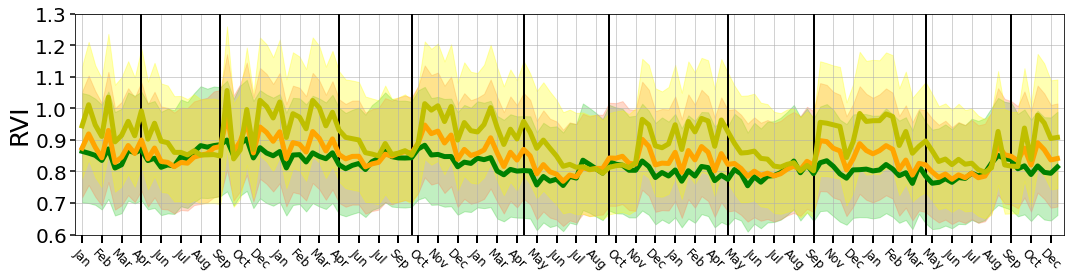

In [117]:
label_size = 20

x = rvi_f.index

fig, ax = plt.subplots(figsize=(15,4))

ax.vlines(x[9], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[21], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[39], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[50], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[67], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[80], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[98], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[111], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[128], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[141], ymin=0, ymax=1.5, colors='k', linewidth=2)

ax.plot(x, rvi_f['median'], 'green', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Forest')
ax.fill_between(x, rvi_f['percentile_25'], rvi_f['percentile_75'], alpha=0.3, color='limegreen')

ax.plot(x, rvi_s['median'], 'orange', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Savanna')
ax.fill_between(x, rvi_s['percentile_25'], rvi_s['percentile_75'], alpha=0.3, color='coral')

ax.plot(x, rvi_c['median'], 'y', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Grassland')
ax.fill_between(x, rvi_c['percentile_25'], rvi_c['percentile_75'], alpha=0.3, color='yellow')

ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, length=8, width=2)
ax.set_xticks(ticks=x)
ax.set_xticklabels(labels=rvi_f['mes'], fontdict={'fontsize': 12, 'rotation': -45})
ax.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
ax.set_ylim([0.6, 1.3])
ax.set_xlim([-1, 149])
ax.set_ylabel('RVI', fontsize=25)
ax.locator_params(axis='x', nbins=60)
ax.locator_params(axis='y', nbins=8)
#ax.legend(fontsize=15, loc='lower left')
ax.grid(True, alpha=0.7)

# sec_0 = ax.twinx()
# sec_0.bar(rain['date'], rain['gauge_mm'], alpha=0.6)
# sec_0.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
# sec_0.locator_params(axis='y', nbins=12)
# sec_0.set_ylim([0, 70])
# sec_0.set_ylabel('rain gauge [mm]', fontsize=20)

# sec_0.set_yticks(np.linspace(sec_0.get_yticks()[0], sec_0.get_yticks()[-1], len(ax.get_yticks())))

plt.tight_layout()

# plt.savefig('C:/Users/jales/Desktop/prvi_profiles.svg', dpi=None, facecolor='w', edgecolor='w',
#     orientation='landscape', format='svg', transparent=False)